In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st 

In [44]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [45]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [46]:
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [47]:
df = df[['mileage','year','price']]

In [48]:
df

,mileage,year,price
0,274117.0,2008,6300
1,190552.0,2011,2899
2,39590.0,2018,5350
3,64146.0,2014,25000
4,6654.0,2018,27700
...,...,...,...
2494,23609.0,2019,7800
2495,34553.0,2018,9200
2496,31594.0,2018,9200
2497,32557.0,2018,9200


In [49]:
df.isna().sum()

mileage    0
year       0
price      0
dtype: int64

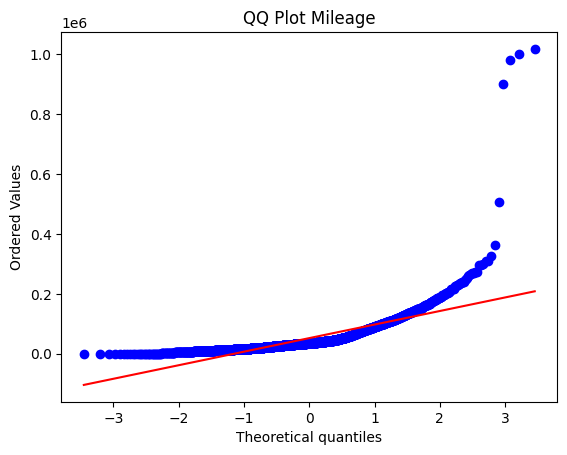

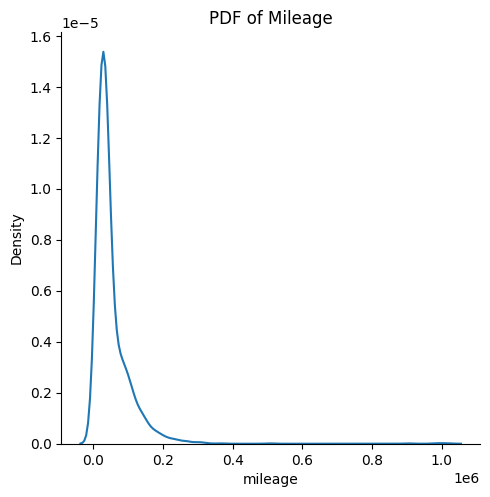

In [50]:
st.probplot(df["mileage"],dist='norm',plot=plt)
plt.title("QQ Plot Mileage")

sns.displot(df["mileage"],kind="kde")
plt.title("PDF of Mileage")
plt.show()



In [51]:
from sklearn.preprocessing import FunctionTransformer


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price'],axis=1),df['price'],train_size = 0.25,random_state = 0)

In [53]:
def tranforms(funct,col):
    trf2 = FunctionTransformer(func=funct)
    X_train_transformed = trf2.fit_transform(X_train)
    st.probplot(X_train_transformed[f"{col}"],dist='norm',plot=plt)
    plt.title("fQQ Plot {col} X_train_transformed")
    plt.show()

    sns.displot(X_train_transformed[f"{col}"],kind="kde")
    plt.title(f"PDF of {col} X_train_transformed")
    plt.show()

    

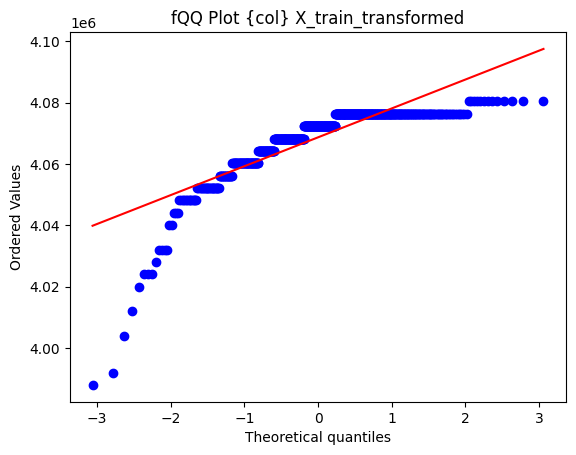

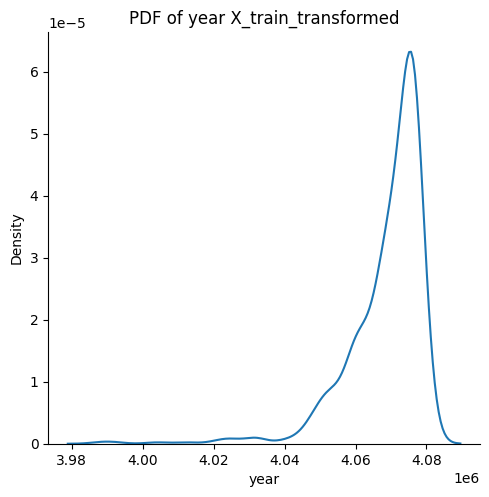

In [54]:
tranforms(lambda x:x**2,'year')

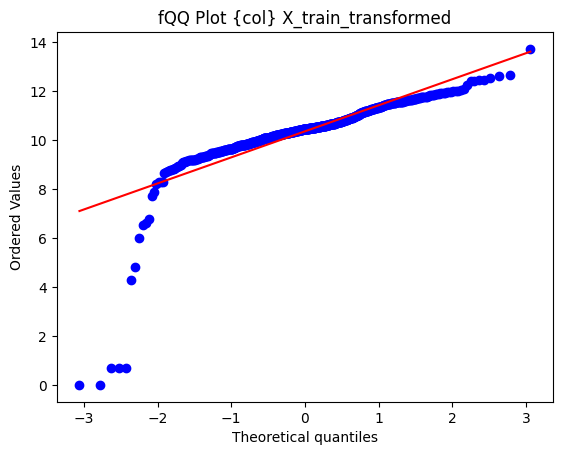

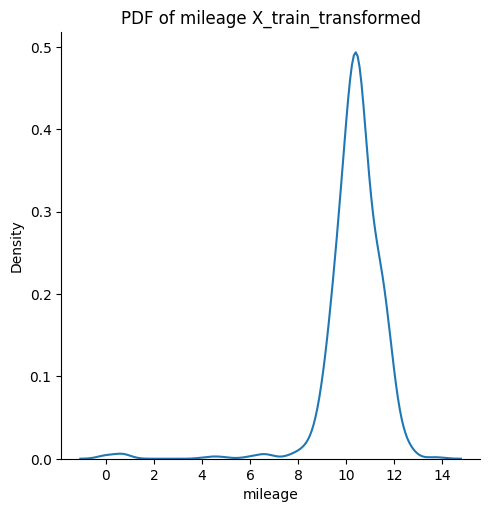

In [ ]:
tranforms(lambda x:np.log1p((x)+0.00001),'mileage')     

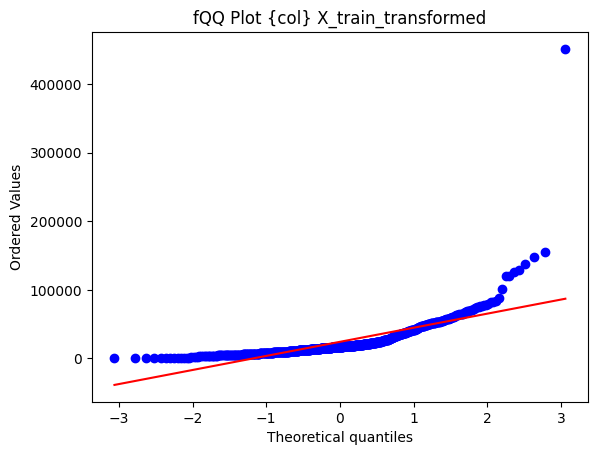

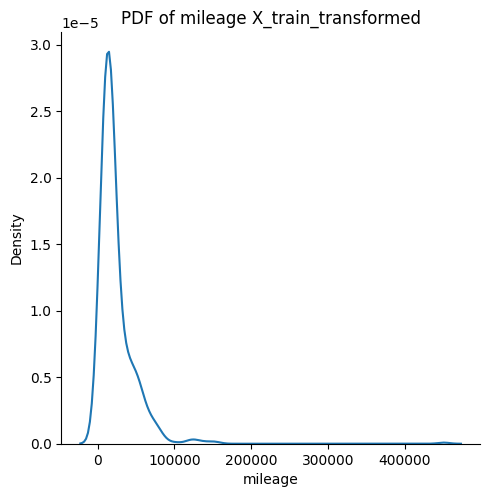

In [57]:
tranforms(lambda x:x**1/2,'mileage')

